In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import seaborn as sns
import sklearn.metrics as metrics

In [2]:
mnist = tf.keras.datasets.mnist
 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
""" resizing images into r x r """

r = 10

sz = x_train.shape[0]
s  = x_test.shape[0]

X_train = np.zeros((sz, r, r))
X_test  = np.zeros((s , r, r))

for i in range(sz):
  X_train[i,:,:] = cv.resize(x_train[i,:,:], (r,r))
 
for i in range(s):
  X_test[i,:,:] = cv.resize(x_test[i,:,:], (r,r))

X_train = np.reshape(X_train, (60000, r, r, 1))
X_test  = np.reshape(X_test,  (10000, r, r, 1))

print(X_train.shape, X_test.shape)

(60000, 10, 10, 1) (10000, 10, 10, 1)


In [4]:
""" Creating the layers in model """

model = tf.keras.models.Sequential([
    
  tf.keras.layers.Flatten(input_shape=(10, 10)),
  tf.keras.layers.Dense(40, activation='relu',use_bias=False),
  tf.keras.layers.Dense(20, activation='relu',use_bias=False),
  tf.keras.layers.Dense(10, use_bias=False),
    
])

In [5]:
""" Specifying the Loss function """

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [6]:
""" Specifying the Optimization Algorithm and 
     metrics to use for evaluation while training """

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [7]:
""" Traning the model """

model.fit(X_train, y_train, epochs=20, batch_size=8, use_multiprocessing=True)

Epoch 1/20
7500/7500 [==============================] - 7s 878us/step - loss: 5.2238 - accuracy: 0.3702
Epoch 2/20
7500/7500 [==============================] - 8s 1ms/step - loss: 0.5330 - accuracy: 0.8359
Epoch 3/20
7500/7500 [==============================] - 7s 876us/step - loss: 0.3021 - accuracy: 0.9133
Epoch 4/20
7500/7500 [==============================] - 6s 836us/step - loss: 0.2372 - accuracy: 0.9313
Epoch 5/20
7500/7500 [==============================] - 6s 861us/step - loss: 0.2188 - accuracy: 0.9358
Epoch 6/20
7500/7500 [==============================] - 7s 872us/step - loss: 0.1894 - accuracy: 0.9438
Epoch 7/20
7500/7500 [==============================] - 6s 861us/step - loss: 0.1803 - accuracy: 0.9459
Epoch 8/20
7500/7500 [==============================] - 7s 872us/step - loss: 0.1681 - accuracy: 0.9509
Epoch 9/20
7500/7500 [==============================] - 7s 877us/step - loss: 0.1690 - accuracy: 0.9516
Epoch 10/20
7500/7500 [==============================] - 7s 884us/

In [8]:
""" Evaluating the model """

model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 0s 770us/step - loss: 0.1963 - accuracy: 0.9505


[0.19627194106578827, 0.9505000114440918]

In [9]:
""" Adding the Softmax layer at the end of model """

probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [10]:
y_prob = probability_model(X_test)

y_pred = np.argmax( y_prob, axis=1)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.97      0.97      1135
           2       0.98      0.92      0.95      1032
           3       0.89      0.97      0.93      1010
           4       0.97      0.92      0.94       982
           5       0.96      0.92      0.94       892
           6       0.97      0.96      0.96       958
           7       0.95      0.97      0.96      1028
           8       0.95      0.94      0.94       974
           9       0.90      0.96      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



Comfusion Matrix
 [[ 961    1    0    1    3    1    5    1    4    3]
 [   0 1098    1    4    1    1    5    8   15    2]
 [   5    3  946   51    6    0    2    6   12    1]
 [   3    1    3  977    0    9    0    8    1    8]
 [   0    2    1    0  905    0    6    5    5   58]
 [   7    3    0   27    0  825    6    5    7   12]
 [   9    4    2    1    8   14  916    0    4    0]
 [   0    3    6    3    4    0    0  993    1   18]
 [   8    0    7   19    2    5    2    7  915    9]
 [   3    3    0   11    5    1    0   13    4  969]]


<AxesSubplot:>

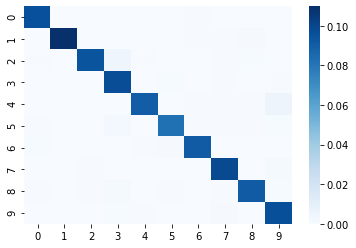

In [11]:
labels = [0,1,2,3,4,5,6,7,8,9]

cf_matrix = metrics.confusion_matrix( y_test, y_pred)

print("Comfusion Matrix\n", cf_matrix)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=False, cmap='Blues', 
            xticklabels = labels , yticklabels = labels)

In [12]:
""" saving the model """

model.save('mnist_ESP32.h5')

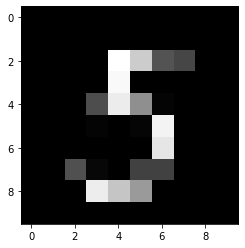

In [13]:
idx = 253

img = X_test[idx:idx+1,:]
im = np.reshape(img, (r,r))

plt.imshow(im, cmap='gray')

In [14]:
np.int32(im)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 232, 185,  76,  64,   0,   0],
       [  0,   0,   0,   0, 226,   0,   0,   0,   0,   0],
       [  0,   0,   0,  70, 214, 130,   4,   0,   0,   0],
       [  0,   0,   0,   4,   0,   5, 222,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 209,   0,   0,   0],
       [  0,   0,  73,   7,   0,  59,  59,   0,   0,   0],
       [  0,   0,   0, 215, 179, 140,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [15]:
print("Predicted by model :", np.argmax( probability_model(img).numpy(), axis=1)[0] )

Predicted by model : 5


In [16]:
L1 = model.weights[0].numpy()

In [17]:
L2 = model.weights[1].numpy()

In [18]:
L3 = model.weights[2].numpy()

In [19]:
""" (ESP32) For Arduino code """

print("char W[%d][%d]="%(L1.shape[1], L1.shape[0]))
print("{")
for c in range(0,L1.shape[1]):
    print("{",end="")
    
    for r in range(0,L1.shape[0]-1):
        print(L1[r,c],end=",")
    print(L1[r+1,c],"},")

print("};")

char W[40][100]=
{
{0.13862501,-0.0035517458,-0.22371408,-0.44188842,-0.37922707,-0.8288191,-0.60441875,-0.45089486,0.10916839,0.0015382767,-0.05846224,-0.44635552,0.1028518,0.29369873,0.032109674,-0.009051031,-0.08327531,0.0227492,-0.21797828,-0.9524195,-0.8426721,0.33394498,-0.32769862,-0.47166774,-0.29545203,-0.30994445,-0.43079543,-0.036498804,0.2870721,0.16258208,-0.9590474,-0.5150557,-0.4460091,-0.33281878,0.02547629,-0.4723707,-0.3714991,-0.15676022,-0.34584433,-0.69655377,-0.78303754,0.0977538,0.0994163,0.43494406,0.3139542,0.021249587,0.10331176,0.06616663,0.527013,-0.4210689,-0.17566466,0.57215524,0.6815849,0.52848405,0.35252115,0.29398546,0.11997143,0.26019904,0.560405,0.40580076,-0.9761954,0.08709669,0.2229915,0.26605493,0.2686998,0.2937593,0.28392062,0.110032775,0.06558057,0.30559224,-0.38160214,-0.09876016,-0.34363434,-0.13001072,0.061232895,-0.03628518,-0.0044010924,-0.25741103,0.25061426,0.42688197,0.19913791,0.37582597,-0.3581963,-0.13961102,-0.35934526,-0.28331384,-0.

{0.11718358,-0.12182442,-0.10500129,0.12784371,-0.0856793,0.03862942,0.18416016,0.20344572,0.11466898,-0.16255675,-0.14449558,-0.01685977,-0.05863072,0.0631118,-0.46426272,-0.21007058,0.19577192,0.19945948,0.11156207,-0.2040145,0.08366628,-0.18885699,0.24476711,0.039832897,-0.03376345,0.04648757,-0.1396081,0.049613602,0.29719323,0.10993452,0.47526813,0.27482945,0.12023982,0.44641924,-0.18245503,-0.40610847,-0.28231928,-0.16845159,0.16815792,-0.057551403,0.27288154,0.47795373,0.32326385,-0.15282372,-0.2472064,-0.020679468,-0.09678065,-0.008902526,0.1057157,-0.18616791,0.25428247,0.12236048,0.011549842,-0.42133296,-1.1992778,-0.70342183,-0.5665673,-0.24470897,0.24365538,-0.17288695,0.13165815,0.14426458,-0.19779254,-0.14284705,-0.704393,-0.86213475,-0.268137,0.20806694,0.319541,0.107944846,0.16075046,0.28335005,0.006585068,0.07343638,-0.2523248,-0.018090066,0.17436054,0.42905512,0.102460995,0.1546016,0.0968229,0.2037211,-0.21228354,0.15246333,0.0589584,-0.27219546,0.25947276,0.34398758,-

{-0.20428652,0.040772706,-0.1572731,0.15153773,-0.08741238,0.26193443,0.13233006,0.077701226,-0.18548146,-0.08168347,0.009704862,0.58403045,-0.25858828,0.0970071,-0.066274844,-0.24509431,-0.26912057,-0.70154434,-0.53885746,0.19165635,-0.16761647,0.108881965,-0.22607006,-0.12628485,-0.08173925,-0.09713833,-0.12571844,0.0517901,0.35792235,1.1617528,-0.060728848,0.074588455,-0.04046692,0.031688824,0.06280936,0.23997907,0.21627598,0.5296556,0.72971004,0.76299244,0.104854815,-0.3079581,-0.11057198,0.027402336,-0.08667688,-0.66299707,-1.722595,-1.4358387,-1.338951,0.09978842,0.3810061,0.11519801,0.104324035,0.18021111,0.22250168,0.013177003,0.060860563,-0.26085088,0.26024467,-0.6219893,0.1763623,0.7181619,0.1031979,-0.4393156,-0.089766026,-0.03543086,0.06381131,0.00922205,0.104260184,0.31510177,0.14653818,-0.19515885,0.1837704,0.051826958,0.09256526,0.15258808,0.14510901,0.009239261,0.03358919,-0.2292973,-0.056422338,-0.56253165,-0.19680803,0.17848225,0.20788176,0.09600068,0.03812594,0.06645

In [20]:
print("char W[%d][%d]="%(L2.shape[1], L2.shape[0]))
print("{")
for c in range(0,L2.shape[1]):
    print("{",end="")
    
    for r in range(0,L2.shape[0]-1):
        print(L2[r,c],end=",")
    print(L2[r+1,c],"},")

print("};")

char W[20][40]=
{
{-0.50094885,0.18646789,0.2648695,-0.069093145,0.56966776,1.0575473,0.4374765,0.23318288,0.04900072,0.19727905,-0.065004334,0.2342236,0.07949648,0.71277064,0.35496214,0.22453415,-0.14336026,-0.07870077,0.117305756,0.11412179,0.15991949,0.3122174,-0.24330653,0.2102865,0.056656253,0.4249376,-0.08933671,-0.05524187,-0.1118556,0.34846452,-0.14876716,0.57269543,0.087635405,0.22897239,0.17061354,-0.70010096,0.21925023,0.22828466,0.25153932,0.3999124 },
{-0.10307538,0.014759355,-0.30340868,-0.04907089,0.2773584,-0.29256737,-0.58178955,-0.29642934,0.22698261,0.32898387,-0.13609727,-0.3610933,0.08975762,-0.08181123,0.29787186,0.31387284,-0.25351205,-0.30945328,0.07484772,-0.09854269,-0.27586707,-0.6805784,-0.20164658,-0.11618824,0.49293083,-0.051134318,-0.41965687,0.0850149,-0.4029098,0.27317443,-0.16289978,-0.06275971,-0.31673583,0.033910163,-0.13991849,0.086230196,0.25846067,-0.13433026,0.29781717,-0.3613322 },
{-0.06073948,-0.011845379,0.15560001,0.13525993,0.73509294,0.096

In [21]:
print("char W[%d][%d]="%(L3.shape[1], L3.shape[0]))
print("{")
for c in range(0,L3.shape[1]):
    print("{",end="")
    
    for r in range(0,L3.shape[0]-1):
        print(L3[r,c],end=",")
    print(L3[r+1,c],"},")

print("};")

char W[10][20]=
{
{-1.2115914,0.037342124,-0.98658544,0.07210789,0.18750507,-0.14302722,-0.0800087,0.2185814,-0.35395986,-0.55705667,0.0809525,-0.64065206,-1.0055577,-1.0479017,0.0886749,-0.08754623,-0.2641452,-0.54812074,-0.060374517,-0.11967228 },
{-0.6017507,-1.7784722,-0.7278359,0.09200161,0.118414804,-0.19045469,-0.371071,0.1530769,-0.24148451,0.05184363,-0.12731381,-0.8216744,-1.1817058,-0.27261746,0.09255493,-0.0071925027,0.32633922,-1.0492023,-0.050503537,-0.06706495 },
{-0.8113109,-0.06860735,-0.49526507,0.0679649,0.17469957,-1.0287733,-0.19364601,0.19417767,0.0027038823,-1.3973743,-0.11203216,-0.5745281,-1.1098894,-0.9904791,0.096503235,-0.0032536094,0.2596323,-0.5031557,0.02029332,-0.11702421 },
{-0.7240343,-0.08820589,-0.59101534,0.16168946,0.128002,-1.1231971,-0.8612594,0.25577608,-0.18058537,-1.357296,-0.36679444,-0.6052598,-0.80793965,-0.4817541,0.044488586,0.0022712133,-0.16391589,-0.73512393,-0.0334895,-0.17314889 },
{-0.8466997,-0.07719185,-0.5803858,-0.07092532,0.151